In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Extract targets

y = df['label']
del df['label']

# Splitting data on train and test

x_train, x_test, y_train, y_test = train_test_split(
    df, y, test_size = 0.2, random_state = 13)

In [3]:
# Transform features data to 2D-array 

x_train = x_train.values.reshape((-1, 28, 28, 1))
x_train = x_train.astype("float32") / 255
x_test = x_test.values.reshape((-1, 28, 28, 1))
x_test = x_test.astype("float32") / 255

# Transform target data to binary

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
# Model building

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Conv2D(64, (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation = "relu"),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(32, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = "Adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       2

In [5]:
# Fit it and save HISTORY

history = model.fit(x_train,
                    y_train,
                    epochs = 10, 
                    batch_size = 64, 
                    validation_data = (x_test, y_test))

history_dict = history.history
history_dict.keys()

Epoch 1/10
525/525 [==============================] - 28s 48ms/step - loss: 0.2707 - accuracy: 0.9215 - val_loss: 0.0942 - val_accuracy: 0.9750
Epoch 2/10
525/525 [==============================] - 24s 46ms/step - loss: 0.0750 - accuracy: 0.9767 - val_loss: 0.0643 - val_accuracy: 0.9812
Epoch 3/10
525/525 [==============================] - 31s 59ms/step - loss: 0.0518 - accuracy: 0.9845 - val_loss: 0.0533 - val_accuracy: 0.9851
Epoch 4/10
525/525 [==============================] - 35s 67ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0547 - val_accuracy: 0.9843
Epoch 5/10
525/525 [==============================] - 59s 113ms/step - loss: 0.0338 - accuracy: 0.9887 - val_loss: 0.0493 - val_accuracy: 0.9860
Epoch 6/10
525/525 [==============================] - 60s 114ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0457 - val_accuracy: 0.9864
Epoch 7/10
525/525 [==============================] - 47s 90ms/step - loss: 0.0295 - accuracy: 0.9900 - val_loss: 0.0514 - val_accurac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

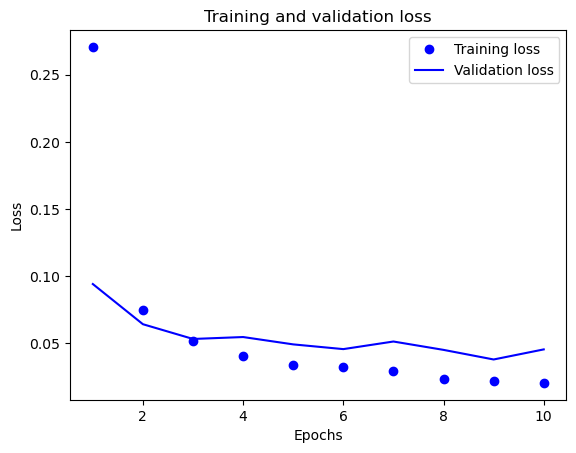

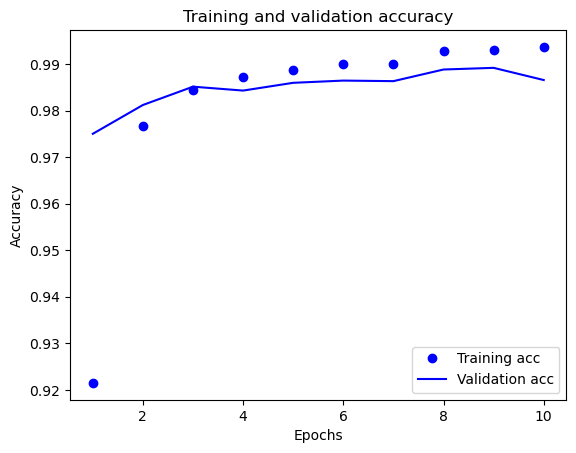

In [6]:
# Visualization of training process, epoch/loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Visualization of training process, epoch/accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
# Prediction test

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

263/263 [==============================] - 2s 9ms/step - loss: 0.0455 - accuracy: 0.9865
test_acc: 0.986547589302063


In [8]:
# Preparing test data

test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

test = test.values.reshape((-1, 28, 28, 1))
test = test.astype("float32") / 255

test.shape

(28000, 28, 28, 1)

In [9]:
# Predict, concat Label and ImageId columns

Label = model.predict(test)

ImageId = np.arange(1, 28001)
Label = np.argmax(Label, axis = 1)
Label = Label.reshape(-1, 1)
ImageId = ImageId.reshape(-1, 1)

submission = np.concatenate((ImageId, Label), axis = 1)

875/875 [==============================] - 8s 8ms/step


In [10]:
# Write submission file

submission = pd.DataFrame(submission).apply(np.int64)
submission = submission.rename(columns = {0: "ImageId", 1: "Label"})
submission.to_csv('/kaggle/working/submission.csv', index=False)
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
